Aus der uniformen Verteilung $X∼\text{Uniform}([0, 10])$ soll eine Stichprobe vom Umfang $n$ gezogen werden.

a) Es sei $n=60$. Bestimmen Sie ein symmetrisches Intervall

$$I=[μ_X−e, μ_X+e]$$

um den Erwartungswert $μ_X$ so, dass sich das arithmetische Mittel der Stich-probe, also $\bar{X_{60}}$, mit der Wahrscheinlichkeit von 95% in $I$ befindet. Ein solches Intervall heisst **Prognoseintervall**. Hinweis: Standardisieren Sie das arithmetische Mittel $\bar{X_n}$ und benützen Sie den Zentralen Grenzwertsatz und $P(\bar{X_n}∈I)=0.95$.

In [1]:
import numpy as np
import scipy.stats as st
from pandas import DataFrame

np.random.seed(1337)

n = 60

data = np.random.uniform(0, 10, n)

# normalize
norm_data = (data - np.min(data))/(np.max(data) - np.min(data))
DataFrame(norm_data).describe()

,0
count,60.000000
mean,0.488863
std,0.296715
min,0.000000
25%,0.258663
50%,0.474990
75%,0.733111
max,1.000000


In [2]:
I = st.norm(norm_data.mean(), norm_data.std()/np.sqrt(n)).interval(0.95)
I

(0.4144130377977815, 0.5633119939840535)

In [3]:
e = (I[1] - I[0])/2
e

0.07444947809313601

b) Umgekehrt: Wie gross muss $n$ gewählt werden, damit $e=0.2$ wird?

In [4]:
e = 0.2

I = [5 - e, 5 + e]
I

[4.8, 5.2]

Da wir wissen dass:

$$e = \frac{5}{\sqrt{3n}}q_{0.975}$$

$n$ erhalten wir durch umformen:

$$n = \frac{(\frac{5q_{0.975}}{e})^2}{3}\rvert_{q_{0.975}=1.96, e=0.2}=800.333$$

In [5]:
n = (((5 * 1.96)/(0.2))**2)/3
n

800.3333333333334

c) Überprüfen Sie a) experimentell, d. h. mit Python: ziehen Sie viele Stichproben (z.B. 200) und zählen Sie, wie viele ausserhalb von $I$ liegen. Python-Hinweise:

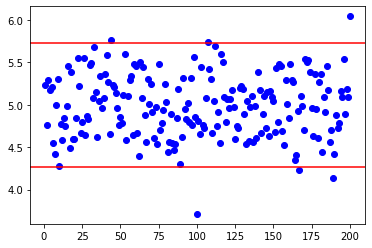

In [7]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
import numpy as np

n = 60 # Anzahl Stichproben

sim_mean = uniform(0, 10).rvs(size=200*n).reshape(200, n).mean(axis=1)
plt.plot(np.arange(1,201,1), sim_mean, "bo")

plt.axhline(y=5.73, color='red')
plt.axhline(y=4.27, color='red')